# Image Processing

Image processing is the processing of digital images (2D signals) or videos (3D signals with the third dimension being time) using mathematical operations. In image processing, the input is an image (represented as a 2D signal) and the output may be another image or a set of properties related to the image. In our case, where we deal with character recognition from images, the output is a character.


## Image
A pixel of an image can be seen as composition of three colors: red, green, and blue (RGB). Usually colors are represented by integer values between 0 and 255 belonging to colors red, green, and blue (RGB, $256 \times 256 \times 256$ = 16777216 colors). An image of size  $w*h$ consists of three matrices of size $w*h$ belonging to those channels, $R$, $G$, $B$. 

Let us read an image. For this purpose we are going to use scikit-image package (already installed with Anaconda) and **imread** function. We should also display the picture using **imshow**. 

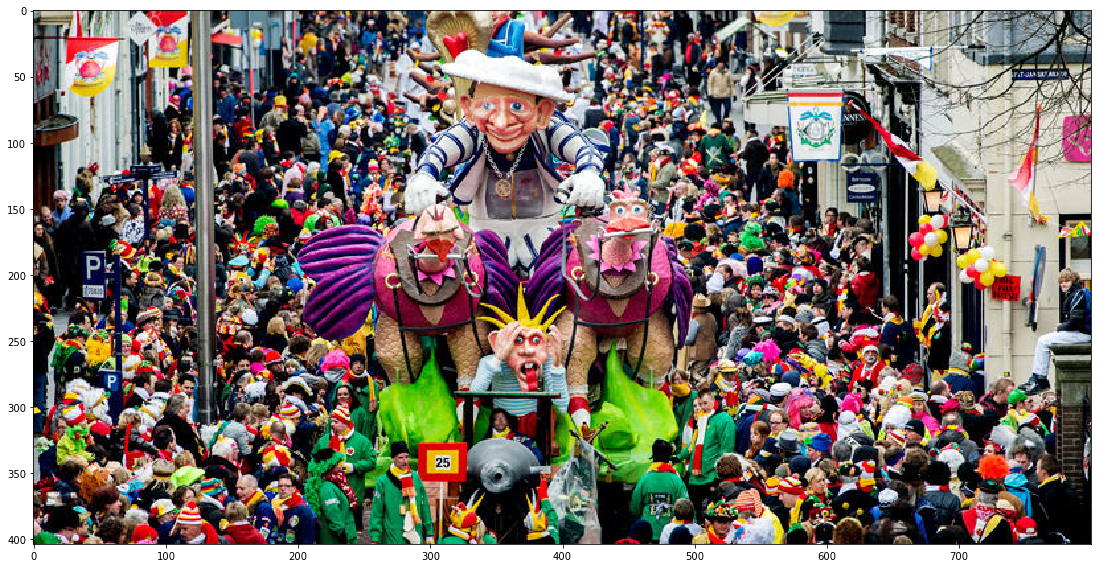

Shape of the image matrix (404L, 800L, 3L)
Shape of the color red (404L, 800L)


In [1]:
%matplotlib inline
import pandas as pd 
from skimage.io import imread, imshow, show
import numpy as np
import matplotlib.pyplot as plt

img = imread('maas2.jpg', as_grey=False)

plt.figure(figsize = (16,8))
imshow(img)
plt.show()
print("{0}" + str(np.shape(img))).format("Shape of the image matrix ")
print("{0}" + str(np.shape(img[...,0]))).format("Shape of the color red ")

Let us now see the individual components of the image and transform it to grayscale. Red is the first component of the image, blue is the second component and green is the third component. In order to see the red component of the image we set green and blue components to 0 by multiplying the image with vector $[1, 0, 0]$. In order to obtain a grayscale image, we can use the formula $0.299 R + 0.587 G + 0.114 B$.

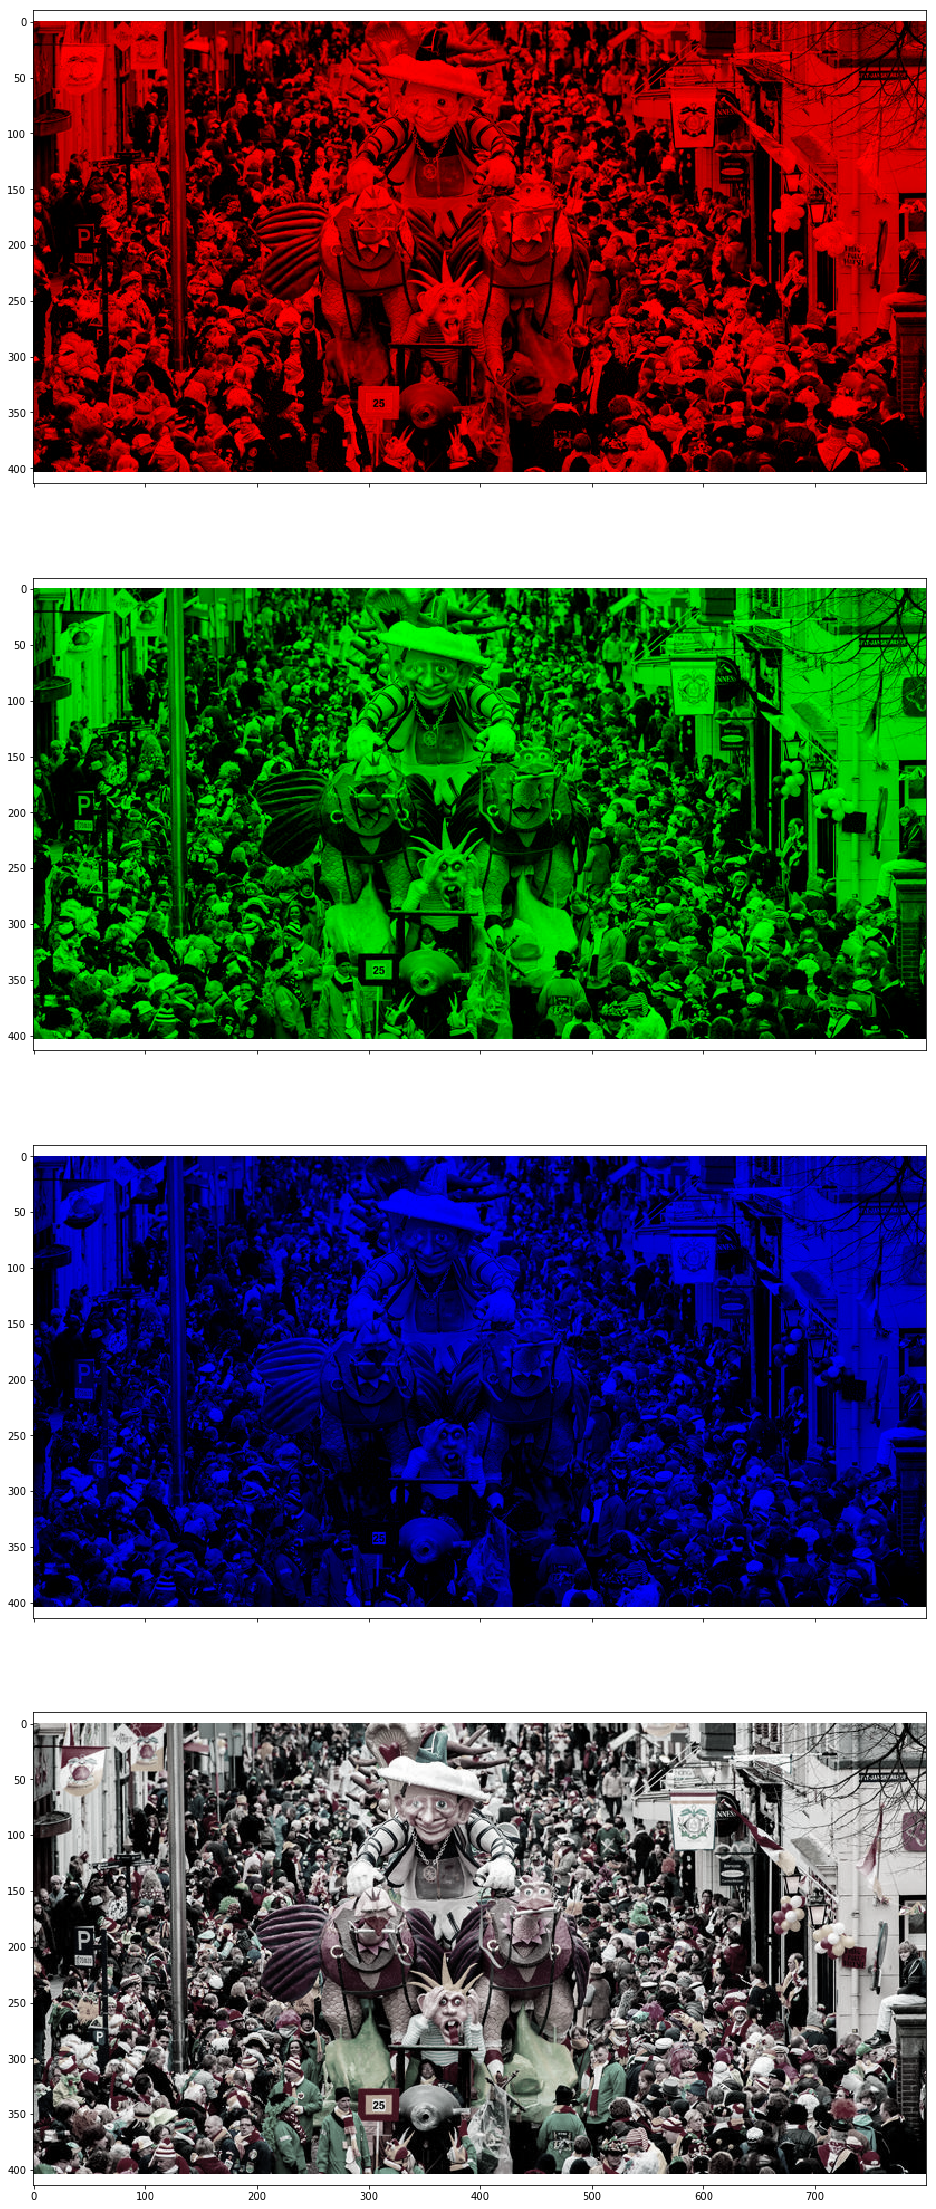

In [2]:
red_multiplier = np.array([1, 0, 0], dtype=np.uint8)
green_multiplier = np.array([0, 1, 0], dtype=np.uint8)
blue_multiplier = np.array([0, 0, 1], dtype=np.uint8)
gray_multiplier = np.array([0.299, 0.587, 0.114], dtype=np.float32)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=1, nrows=4, figsize=(16, 40), sharex=True, sharey=True)
ax1.imshow(img * red_multiplier)
ax2.imshow(img * green_multiplier)
ax3.imshow(img * blue_multiplier)
img[...,0] = np.dot(img,gray_multiplier)
img[...,1] = np.dot(img,gray_multiplier)
img[...,2] = np.dot(img,gray_multiplier)

ax4.imshow(img)
show()


In image processing colors are only useful under specific circumstances, such as when looking for a specific object. We are mostly interested in changes of colors (to detect an object, to detect edges of an object) instead of colors themselves.  

A grayscale image consists of a single matrix of size $w*h$ consisting of integers in range 0 and 255. We use grayscale images in our prediction model. In python package skimage there are several options for representing colors. We use float values between 0 and 1, where 0 is black, and 1 is white.


The shape of a grayscale image (454L, 681L)


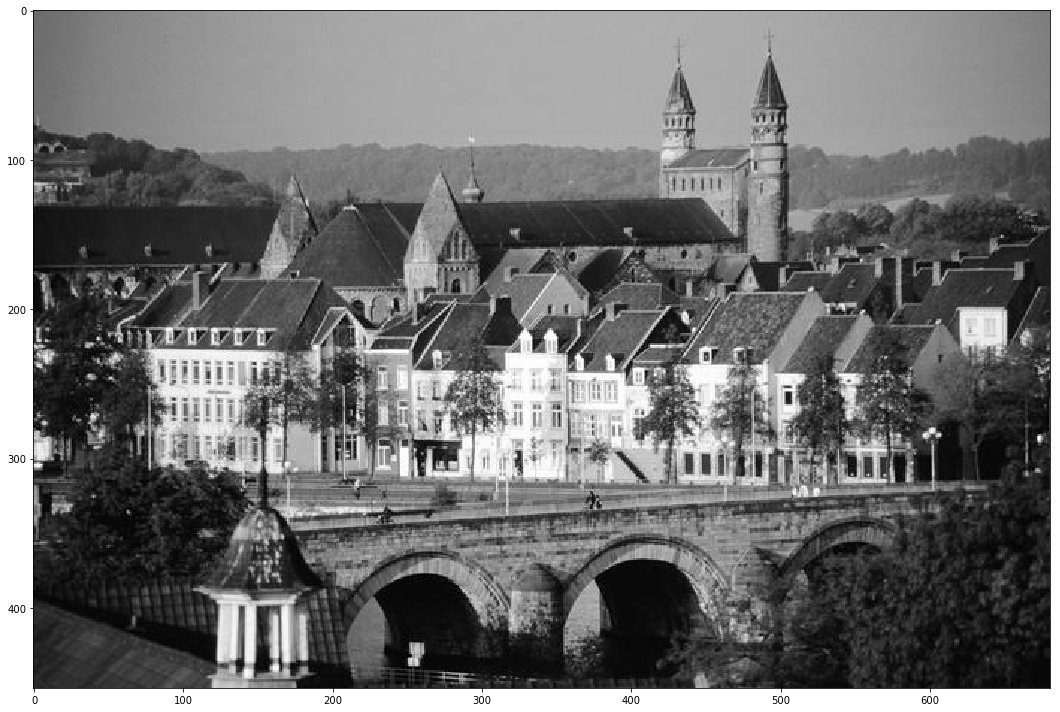

In [3]:
img = imread('maas.jpg', as_grey=True)
print("{0}" + str(np.shape(img))).format("The shape of a grayscale image ")

fig, ax = plt.subplots(figsize=(15, 10))
imshow(img)
show()

In order to detect objects in an image, we look at changes in pixel values and use "gradient" function in numpy. Gradient function returns two arrays: vertical gradient and horizontal gradient. By combining both we obtain the edges of objects.

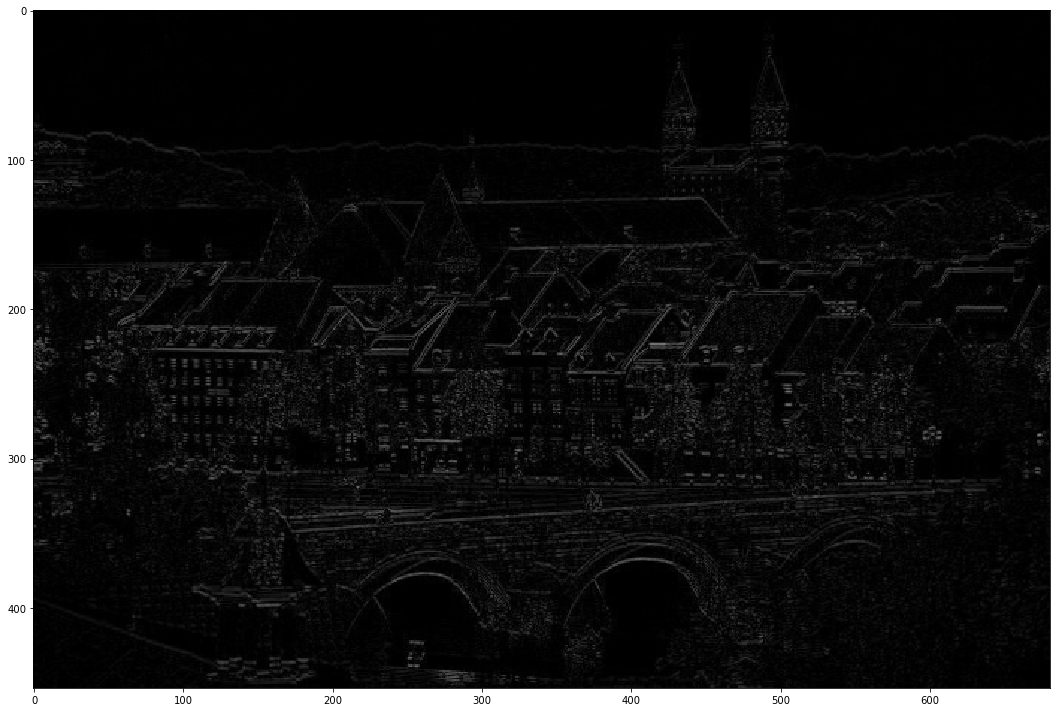

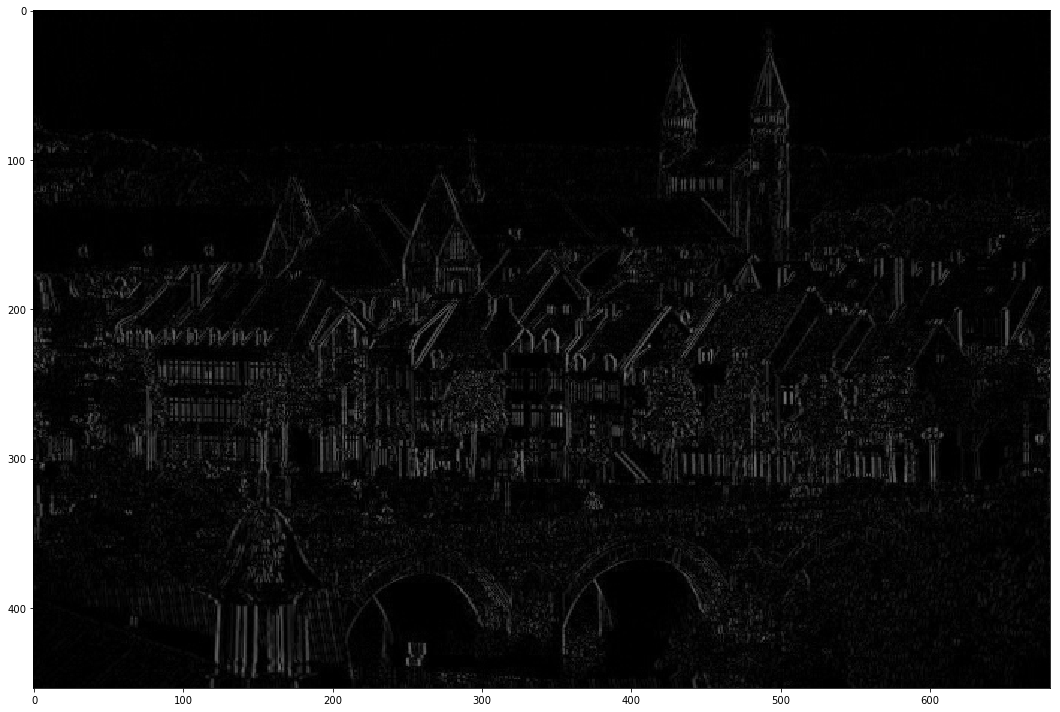

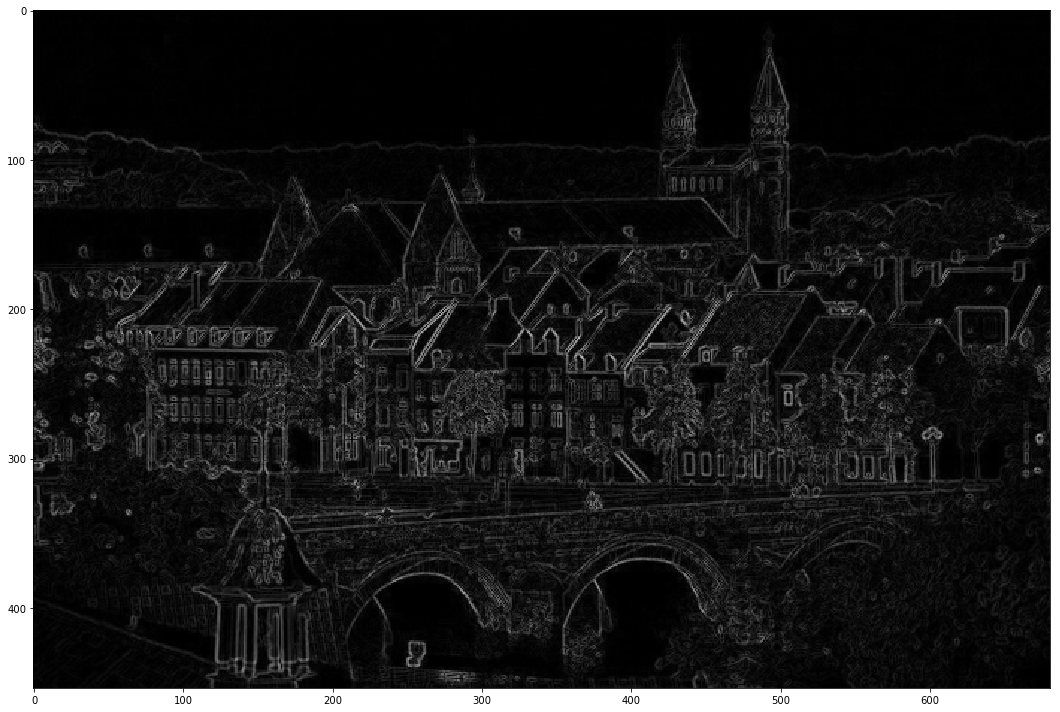

In [4]:
x = np.gradient(img)


fig, ax = plt.subplots(figsize=(15, 10))
imshow(np.abs(x[0]))
show()

fig, ax = plt.subplots(figsize=(15, 10))
imshow(np.abs(x[1]))
show()

fig, ax = plt.subplots(figsize=(15, 10))
imshow((np.abs(x[0])+np.abs(x[1])))
show()

# Character recognition from images

In this case study, we use Google Street View images from Kaggle Competition, Introduction to Julia. Images are processed, so they have the same resolution ($20 \times 20 = 400$ pixels). We first read images (in grayscale) and reshape the image to a $1 \times 400$ array.

We first write a function to read training and testing data. This function takes as argument:
* Path of Main Folder
* Path of Subfolder (train, test)
* Labels of images as a dataframe
* Size of an image


In [5]:
%matplotlib inline

import pandas as pd 
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

"""
Input: Folder names (For train, test data sets)
Output: Dataframes containing pictures as vectors
"""
def read_data(typeData, labelsInfo, imageSize, path):
    #Intialize x  matrix
    x = np.zeros((labelsInfo.shape[0], imageSize))
    for (index, idImage) in enumerate(labelsInfo["ID"]):
    #Read image file
        nameFile = "{0}/{1}/{2}.Bmp".format(path, typeData, idImage)
        img = imread(nameFile, as_grey=True)
        img = np.reshape(img, (1, imageSize))
        #img = normalize(img)
        #img = np.reshape(img, (20,20))
        #img1 = np.gradient(img)
        #img1 = np.abs(img1[0]) + np.abs(img1[1])
        #[index, :] = normalize((np.reshape(img, (1, imageSize)) >=0.5))
        x[index, :] = np.reshape(img, (1, imageSize))
        
    return x


We use trainLabels.csv and sampleSubmission.csv in order to read image labels.

In [6]:
imageSize = 400 # 20 x 20 pixels

#Set location of data files , folders
path = 'D:\\Dropbox\\GitHub\\DA515\\Week 7'

#This is necessary to retrieve names and labels of training images
labelsInfoTrain = pd.read_csv("trainLabels.csv")

#Read training matrix. Each image is reshaped as a 1 x 400 array
xTrain = read_data("trainResized", labelsInfoTrain, imageSize, path)

#This is necessary to retrieve names of testing images. This time we only read information about test data ( IDs ).
labelsInfoTest = pd.read_csv("sampleSubmission.csv")

#Read test matrix
xTest = read_data("testResized", labelsInfoTest, imageSize, path)

Let us draw an image in color and in grayscale. After drawing the image in grayscale, we can also invert the colors. I used 'trainResized/3.Bmp'.

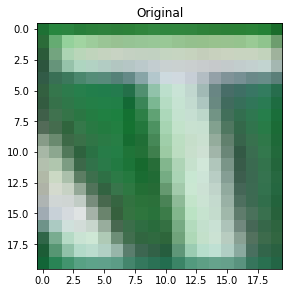

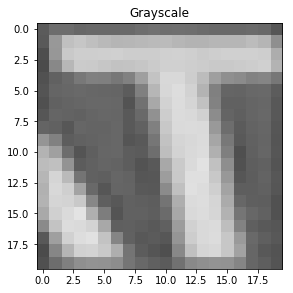

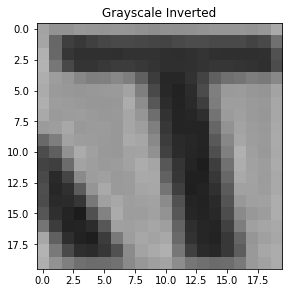

In [7]:
img = imread('trainResized/3.Bmp', as_grey = False)
imshow(img)
plt.title('Original')
show()


img = imread('trainResized/3.Bmp', as_grey=True)
imshow(img)
plt.title('Grayscale')
show()

img = 1- img
imshow(img)
plt.title('Grayscale Inverted')
show()

In order to use labels, we are going to use **map** function. Each character is going to be converted to its ASCII value.

In [8]:
"""
In order to convert a label to an integer, we use ascii codes. map(ord, ....) converts characters 
to their values from ascii conversion table, and map(chr, ....) converts an integer to corresponging
character.
"""
yTrain = map(ord, labelsInfoTrain["Class"])
yTrain = np.array(yTrain)

# Prediction

We apply Random Forest Classifier algorithms to solve the problem. k-Nearest Neighbors is also frequently used in image recognition. We set number of estimators to 100.

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,verbose=1)

rf.fit(xTrain,yTrain)
y_pred = rf.predict(xTest)
y_pred2 = map(chr, y_pred)
labelsInfoTest['Class'] = y_pred2
labelsInfoTest.to_csv('Results_random_forest.csv', index=False)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(xTrain,yTrain)
y_pred = knn.predict(xTest)
y_pred2 = map(chr, y_pred)
labelsInfoTest['Class'] = y_pred2
labelsInfoTest.to_csv('Results_knn.csv', index=False)

Which one is better? 

Random Forest Classifier: 0.45
KNeighborsClassifier: 0.38

# Improvements

We are going to focus on RandomForestClassifier. We are not going to change the parameters. First let us see important pixels in prediction.

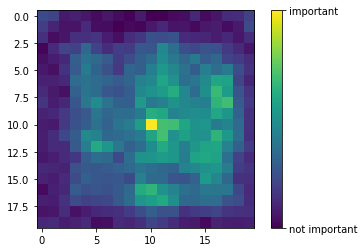

In [11]:
features = rf.feature_importances_
features = np.reshape(features,(20,20))
plt.imshow(features, interpolation='none')
cb = plt.colorbar()
cb.set_ticks([rf.feature_importances_.min(), rf.feature_importances_.max()]) 
cb.set_ticklabels(['not important', 'important'])  # put text labels on them
plt.show()


Next step in our prediction is adding negatives of images for training. It might be useful as images may have dark or light background. It helps us increase training data size.

In [12]:
xTrain = np.append(xTrain, 1- xTrain, axis = 0)
yTrain = np.append(yTrain, yTrain, axis = 0)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   57.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


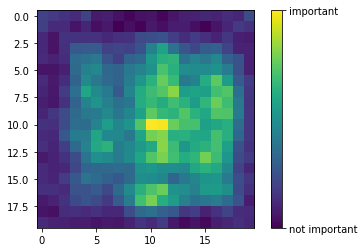

In [13]:
rf = RandomForestClassifier(n_estimators = 100,verbose=1)
rf.fit(xTrain,yTrain)
y_pred = rf.predict(xTest)
y_pred2 = map(chr, y_pred)
labelsInfoTest['Class'] = y_pred2
labelsInfoTest.to_csv('Results_random_forest_negative.csv', index=False)

features = rf.feature_importances_
features = np.reshape(features,(20,20))
plt.imshow(features, interpolation='none')
cb = plt.colorbar()
cb.set_ticks([rf.feature_importances_.min(), rf.feature_importances_.max()])  
cb.set_ticklabels(['not important', 'important'])  # put text labels on them
plt.show()

Now the accuracy is 0.47. 

We can use scaling in order to improve the accuracy. We rescale the values of pixels to fall in range [0,1]. Let us use 'trainResized/3.Bmp' for testing the effect of rescaling.

In [14]:
"""
Used in order to normalize data:
Input: Grayscale image
Output: Same image converted to range white and black (0-1)
"""
def scale(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    minval = arr.min()
    maxval = arr.max()
    if minval != maxval:
        arr -= minval
        arr *= (255.0/(maxval-minval))
    return arr/255


Minimum value of a pixel 0.293496862745
Maximum value of a pixel 0.886862745098


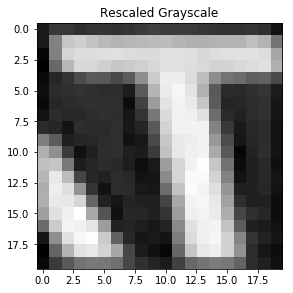

Minimum value of a pixel 0.0
Maximum value of a pixel 1.0


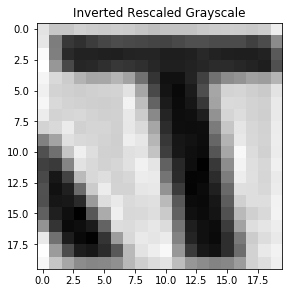

In [15]:
img = imread('trainResized/3.Bmp', as_grey=True)
print('Minimum value of a pixel ' + str(img.min()))
print('Maximum value of a pixel ' + str(img.max()))

img = scale(img)
#To avoid numerical instabilities
img[img >= 1] = 1
img[img <= 0] = 0
imshow(img)
plt.title('Rescaled Grayscale')
show()
print('Minimum value of a pixel ' + str(img.min()))
print('Maximum value of a pixel ' + str(img.max()))

img = 1-img
imshow(img)
plt.title('Inverted Rescaled Grayscale')
show()


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   43.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


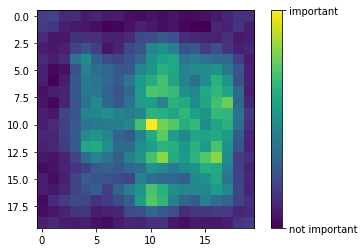

In [16]:
for i in range(len(xTrain)):
    xTrain[i,:] = scale(xTrain[i,:])

for i in range(len(xTest)):
    xTest[i,:] = scale(xTest[i,:])
                     
xTrain[xTrain > 1] = 1
xTrain[xTrain < 0] = 0
xTest[xTest > 1] = 1
xTest[xTest < 0] = 0

rf = RandomForestClassifier(n_estimators = 100,verbose=1)
rf.fit(xTrain,yTrain)
y_pred = rf.predict(xTest)
y_pred2 = map(chr, y_pred)
labelsInfoTest['Class'] = y_pred2
labelsInfoTest.to_csv('Results_random_forest_negative_rescaled.csv', index=False)


features = rf.feature_importances_
features = np.reshape(features,(20,20))
plt.imshow(features, interpolation='none')
cb = plt.colorbar()
cb.set_ticks([rf.feature_importances_.min(), rf.feature_importances_.max()])  # force there to be only 3 ticks
cb.set_ticklabels(['not important', 'important'])  # put text labels on them
plt.show()

Now the accuracy is 0.54. This is not bad compared to where we started. Now let us do one more trick. We set a threshold in order to binarize the images. Let us visualize the effect on 'trainResized/3.Bmp'.

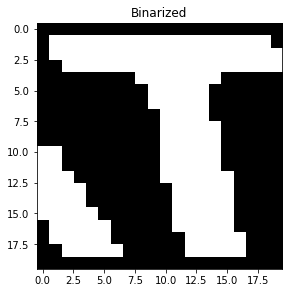

In [17]:
img = imread('trainResized/3.Bmp', as_grey=True)
img = scale(img)
img = (img >= 0.5) *1.0
imshow(img)
plt.title('Binarized')
show()

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


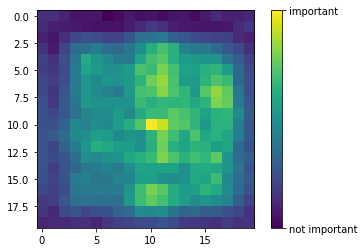

In [18]:
xTrain = (xTrain >= 0.5)*1
xTest = (xTest >= 0.5)*1

rf = RandomForestClassifier(n_estimators = 100, verbose = 1)

rf.fit(xTrain,yTrain)
y_pred = rf.predict(xTest)
y_pred2 = map(chr, y_pred)
labelsInfoTest['Class'] = y_pred2
labelsInfoTest.to_csv('Results_random_forest_negative_rescaled_binary.csv', index=False)

features = rf.feature_importances_

features = np.reshape(features,(20,20))

plt.imshow(features, interpolation='none')
cb = plt.colorbar()
cb.set_ticks([rf.feature_importances_.min(), rf.feature_importances_.max()])  # force there to be only 3 ticks
cb.set_ticklabels(['not important', 'important'])  # put text labels on them
plt.show()

Now we reach 0.61 accuracy. It corresponds to an almost 15% improvement.

# Sources

http://scikit-image.org/

https://www.kaggle.com/c/street-view-getting-started-with-julia

http://www.cs.uregina.ca/Links/class-info/325/PythonPictures/

https://en.wikipedia.org/wiki/Edge_detection

Histogram of Oriented Gradients
http://www.comp.nus.edu.sg/~tians/papers/ICPR2014_Convolution-CoHOG_Su.pdf


# Neural Networks
Neural networks are a prefered method in image classification. You can use MLP classifier with the following parameters on the default data set to reach 0.62 accuracy.

In [19]:
imageSize = 400 # 20 x 20 pixels

#Set location of data files , folders
path = 'D:\\Dropbox\\GitHub\\DA515\\Week 7'

#This is necessary to retrieve names and labels of training images
labelsInfoTrain = pd.read_csv("trainLabels.csv")

#Read training matrix. Each image is reshaped as a 1 x 400 array
xTrain = read_data("trainResized", labelsInfoTrain, imageSize, path)

#This is necessary to retrieve names of testing images. This time we only read information about test data ( IDs ).
labelsInfoTest = pd.read_csv("sampleSubmission.csv")

#Read test matrix
xTest = read_data("testResized", labelsInfoTest, imageSize, path)

yTrain = map(ord, labelsInfoTrain["Class"])
yTrain = np.array(yTrain)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes =(400,400))
mlp.fit(xTrain, yTrain)

y_pred = mlp.predict(xTest)
y_pred2 = map(chr, y_pred)
labelsInfoTest['Class'] = y_pred2
labelsInfoTest.to_csv('Results_mlp.csv', index=False)

